In [40]:
# importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [41]:
# uploading the dataset from the local directory
df = pd.read_csv(r'C:/Users/test/Documents/tochora/baba/all_kindle_review .csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


NB : the dataset can be founnd by serching it in kaggle.Only two columns from th dataset were important for analysis that is reviewText and rating.

In [42]:
# selecting important columns for analysis
df = df[['reviewText', 'rating']]
df.head()

,reviewText,rating
0,"Jace Rankin may be short, but he's nothing to ...",3
1,Great short read. I didn't want to put it dow...,5
2,I'll start by saying this is the first of four...,3
3,Aggie is Angela Lansbury who carries pocketboo...,3
4,I did not expect this type of book to be in li...,4


In [43]:
# shape of the dataset
df.shape

(12000, 2)

our manipulated dataset has 12000 rows and 2 .

In [44]:
# checking null values
df.isnull().sum()

reviewText    0
rating        0
dtype: int64

our dataset is does not have any null values.

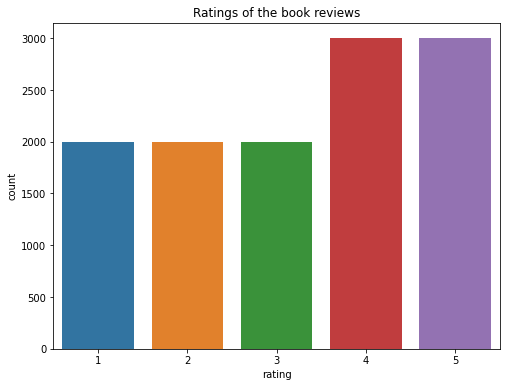

In [45]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['rating'])
plt.title('Ratings of the book reviews')
plt.show()

The distribution of reviews rated 4 and 5 are the highest while those rated 1,2,3 are the lowest.There was a tendency of books being reviewed on a simmilar manner thus the simillarity of the bars length.

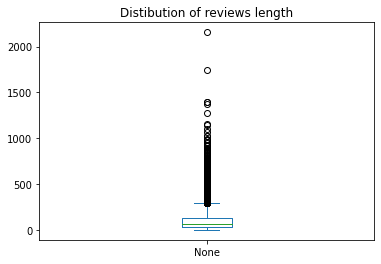

In [46]:
# calculating the length of the reviews
review_len = pd.Series(len(review.split()) for review in df['reviewText'])
# plotting the distribution of reviews length
review_len.plot(kind='box')
plt.title('Distibution of reviews length')
plt.show()

The above boxplot shows there are many outliers of various lengths of the reviews text.

count    2000.00000
mean       96.14650
std       112.20998
min         6.00000
25%        32.00000
50%        57.00000
75%       111.00000
max      1379.00000
Name: Length, dtype: float64

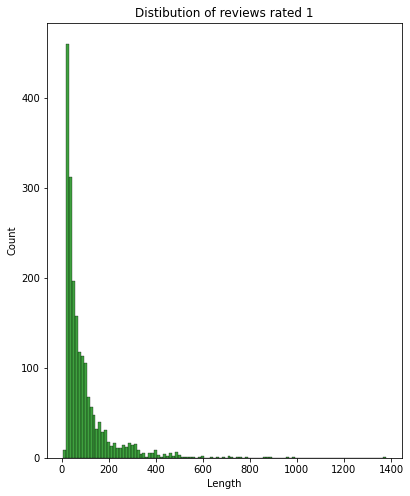

In [47]:
# a display of the statistics and distribution of rating = 1 
fig = plt.figure(figsize=(14, 8))
df['Length'] = df.reviewText.str.split().apply(len)
axx = fig.add_subplot(122)
sns.histplot(df[df['rating']==1]['Length'],ax=axx, color='green')
plt.title('Distibution of reviews rated 1')
display(df.Length[df.rating==1].describe())

count    2000.000000
mean      115.194000
std       131.039093
min        16.000000
25%        35.000000
50%        71.000000
75%       140.000000
max      1400.000000
Name: Length, dtype: float64

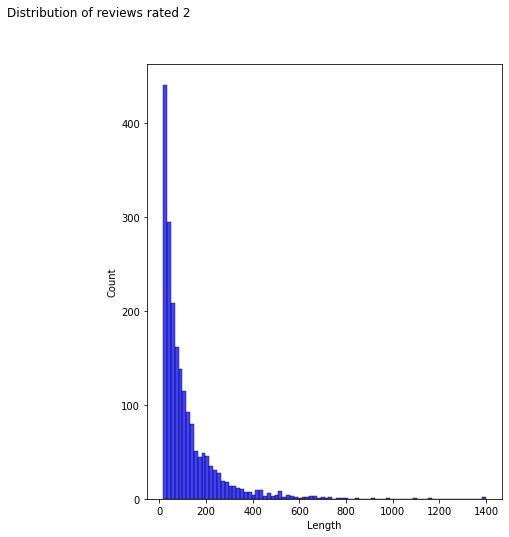

In [48]:
# a display of the statistics and distribution of rating = 2 
fig = plt.figure(figsize=(14, 8))
df['Length'] = df.reviewText.str.split().apply(len)
axx = fig.add_subplot(122)
sns.histplot(df[df['rating']==2]['Length'],ax=axx, color='blue')
plt.suptitle('Distribution of reviews rated 2')
display(df.Length[df.rating==2].describe())

count    2000.000000
mean      119.343000
std       138.136636
min         2.000000
25%        35.000000
50%        71.500000
75%       151.000000
max      2156.000000
Name: Length, dtype: float64

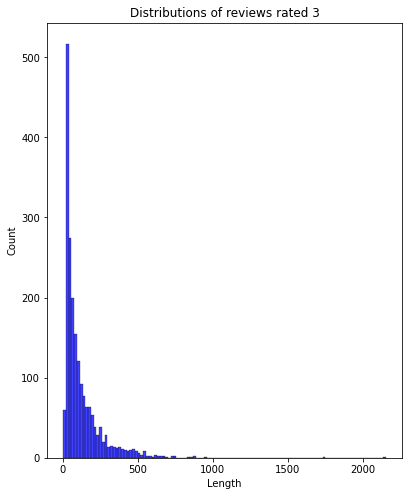

In [49]:
# a display of the statistics and distribution of rating = 3 
fig = plt.figure(figsize=(14, 8))
df['Length'] = df.reviewText.str.split().apply(len)
axx = fig.add_subplot(122)
sns.histplot(df[df['rating']==3]['Length'],ax=axx, color='blue')
plt.title('Distributions of reviews rated 3')
display(df.Length[df.rating==3].describe())

count    3000.0000
mean      119.4160
std       133.4897
min         1.0000
25%        33.0000
50%        67.0000
75%       153.2500
max      1281.0000
Name: Length, dtype: float64

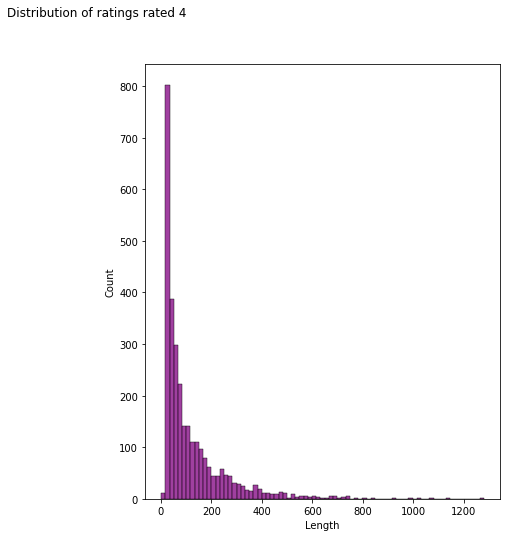

In [50]:
# a display of the statistics and distribution of ratings 
fig = plt.figure(figsize=(14, 8))
df['Length'] = df.reviewText.str.split().apply(len)
axx = fig.add_subplot(122)
sns.histplot(df[df['rating']==4]['Length'],ax=axx, color='purple')
plt.suptitle('Distribution of ratings rated 4')
display(df.Length[df.rating==4].describe())

count    3000.000000
mean       97.075667
std       113.052582
min         2.000000
25%        29.000000
50%        52.000000
75%       115.250000
max      1030.000000
Name: Length, dtype: float64

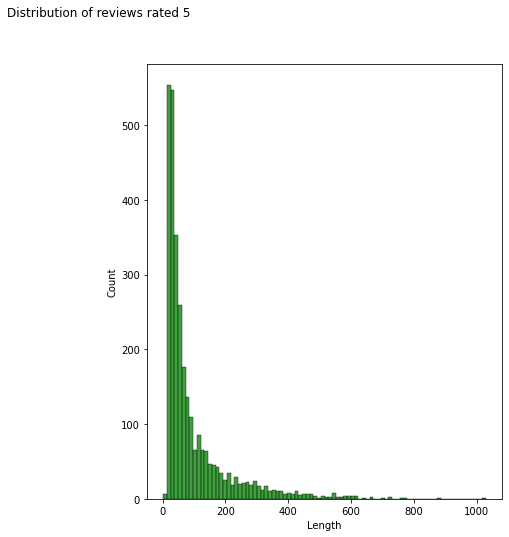

In [51]:
# a display of the statistics and distribution of rating = 5
fig = plt.figure(figsize=(14, 8))
df['Length'] = df.reviewText.str.split().apply(len)
axx = fig.add_subplot(122)
sns.histplot(df[df['rating']==5]['Length'],ax=axx, color='green')
plt.suptitle('Distribution of reviews rated 5')
display(df.Length[df.rating==5].describe())

all distributions of the various rattings of the book reviews shows that data is highly skewed to the left.

Different wordclouds of ratings in the dataset

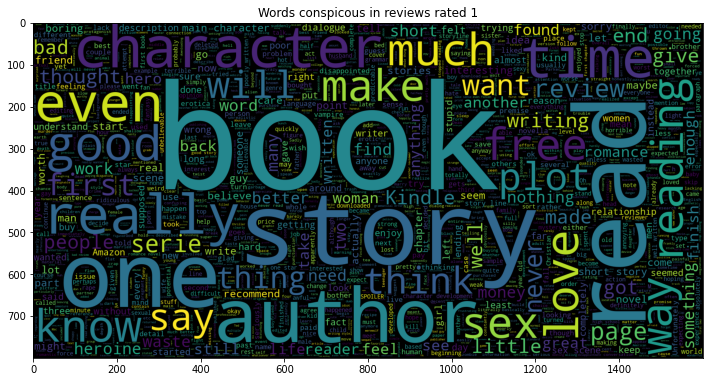

In [52]:
from wordcloud import WordCloud
plt.figure(figsize=(12, 12))
wm1 = WordCloud(max_words=2000, height=800, width=1600, background_color='black').generate(
    ' '.join(df[df['rating']==1].reviewText)
)
plt.title(f'Words conspicous in reviews rated 1')
plt.imshow(wm1)

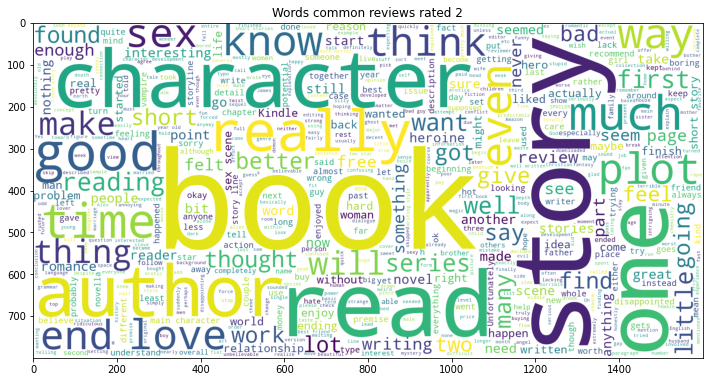

In [53]:
plt.figure(figsize=(12, 12))
wm2 = WordCloud(max_words=2000, min_font_size=10, height=800, width=1600, background_color='white').generate(
    ' '.join(df[df['rating']==2].reviewText)
)
plt.title('Words common reviews rated 2')
plt.imshow(wm2)

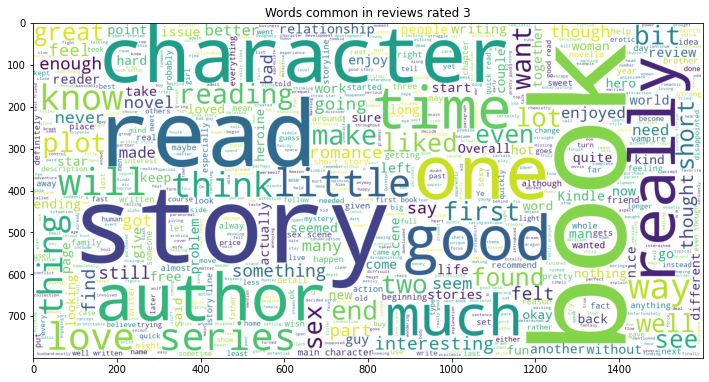

In [54]:
plt.figure(figsize=(12, 12))
wm3 = WordCloud(max_words=2000, min_font_size=10, height=800, width=1600, background_color='white').generate(
    " ".join(df[df['rating']==3].reviewText)
)
plt.title('Words common in reviews rated 3')
plt.imshow(wm3)

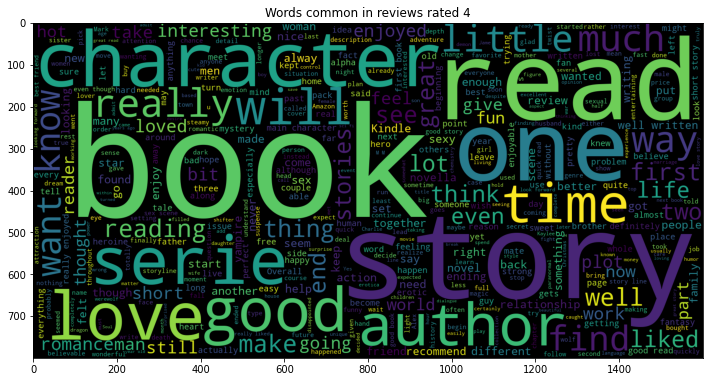

In [55]:
plt.figure(figsize=(12, 12))
wm4 = WordCloud(max_words=2000,min_font_size=10, height=800, width=1600,background_color='black').generate(
    " ".join(df[df['rating']==4].reviewText)
)
plt.title('Words common in reviews rated 4')
plt.imshow(wm4)

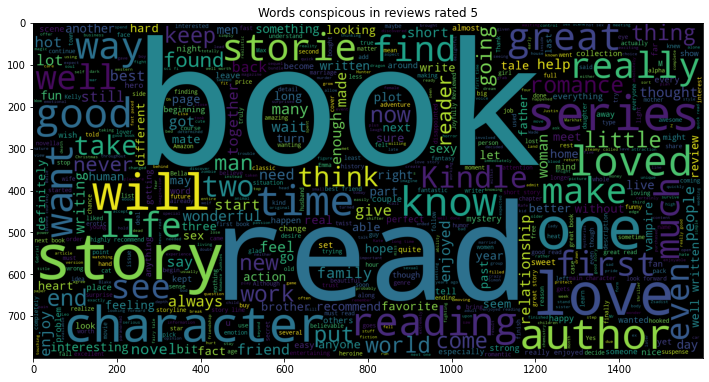

In [56]:
plt.figure(figsize=(12, 12))
wm5 = WordCloud(max_words=2000, min_font_size=10, height=800, width=1600, background_color='black').generate(
    " ".join(df[df['rating']==5].reviewText)
)
plt.title('Words conspicous in reviews rated 5')
plt.imshow(wm5)

These wordclouds shows various words in a visual format.the bigger the word, the more important and frequent it is.

In [57]:
# importing necessary libraries for text data anlysis
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import string
ps = PorterStemmer()
# a fuction to  clean data
def preprocessing(data):
    corpus = []
    for i in range(len(data)):
        # remove urls
        review1 = re.sub(r'http\S+', ' ', data['reviewText'][i])
        # remove html tags
        review2 = re.sub(r'<.*?>','', review1)
        # remove digits
        review3 = re.sub(r'\d','', review2)
        # remove hashtags
        review4 = re.sub(r'#\w+', ' ', review3)
        # removing puctuation marks
        review = re.sub(r'[^a-zA-Z]', ' ', review4)
        review = review.split()
        # removing common unimportant words like are,the, not ... from the text using stopwords from nltk package
        review = [word for word in review if word not in set(stopwords.words('english'))]
        # applying porterstemmer to cut various words in the text into their basic form
        review = [ps.stem(word) for word in review]
        review = ' '.join(review)
        corpus.append(review)
    return corpus

In [58]:
corpustrain = preprocessing(df)

In [59]:
# a sample of cleaned data
corpustrain[0:5]

['jace rankin may short noth mess man haul saloon undertak know he famou bounti hunter oregon shot man saloon finish year long quest aveng sister murder tri figur next when snotti nose farm boy rescu gang bulli offer money kill man forc ranch reluctantli agre bring man justic kill outright but first need tell sister widow news kyla kyle springer bailey ride trail sleep ground past month tri find jace she want reveng man kill husband took ranch amongst crime keen detour jace want take but realiz option hide behind boy persona best tri keep pace when confront along way get shot jace discov kyle kyla come clean whole reason need scoundrel dead hope still help the book share touch moment slow bloom romanc kyla find good reason fear men hide behind boy persona watch jace slowli pull shell help conquer fear endear her pain real deepli root disappear face sexi neither understand avers marriag magic disappear round nooki whi would man drift town town entir adult life man kill fair share men al

In [60]:
# a fuction to aggregate ratings into values of 1 and 0
def sentiment(review):
    if review >= 3:
        return 1
    else:
        return 0
df['sentiment'] = df['rating'].apply(sentiment)

In [61]:
# dropping the length column
df.drop(columns=['Length'],axis=1, inplace=True)
df.head()

,reviewText,rating,sentiment
0,"Jace Rankin may be short, but he's nothing to ...",3,1
1,Great short read. I didn't want to put it dow...,5,1
2,I'll start by saying this is the first of four...,3,1
3,Aggie is Angela Lansbury who carries pocketboo...,3,1
4,I did not expect this type of book to be in li...,4,1


Bag of words

In [62]:
# applying tfidvectorizer to count the number of times a word appears in different documents 
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(ngram_range=(1, 3), max_features=10000)
# segmenting our text into x and y variables
x = corpustrain
y = df['sentiment']

In [63]:
# splitting our data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=20)
# applying tfidvectorizer to standardize our data
x_train = cv.fit_transform(x_train).toarray()
x_test = cv.transform(x_test).toarray()

In [64]:
# modelling our data using logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# fitting our model
lr.fit(x_train, y_train)
acc = lr.score(x_test, y_test)
print(acc)

0.8456666666666667
